# Research Questions

## RQ1: How does the numeric rating/score within reviews affect the booking rates of listings?

## RQ2: How does the sentiment and language used in Airbnb text reviews correlate with booking rate?

## RQ3: Can the frequency and quality of host responses (time) predict the likelihood of repeat or future bookings?

- handle missing values (henry)
- coorelation analysis (Brandon)
- histogram/scatterplot for some key variables 
- summary stats (nawal)


1) If your research questions have been updated from the proposal. What's your new research questions?
2) Describe if your methodology has been updated since milestone 1 (proposal) and how. 
3) Describe your current results, e.g., finding from data exploration, answer to research questions 1. 
4) Update the member contribution section based on progress so far.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


# Replace 'your_dataset.csv' with the path to your CSV file
file_path = './raw-dataset/nyc_listings.csv' 

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Output the first 5 rows of the DataFrame
df



In [5]:
def combine_data(source_folder_name="raw-dataset"):
    
    locations = ['toronto','sanfran','nyc','london','sydney']
    types = ['listings', 'reviews']

    global listings, reviews
    listings = pd.DataFrame()
    reviews = pd.DataFrame()

    for t in types:
        
        data = []
        for l in locations:
            filename = f"./{source_folder_name}/{l}_{t}.csv"
            data.append(pd.read_csv(filename))

        if t == 'listings':
            listings = pd.concat(data)

        if t == 'reviews':
            reviews = pd.concat(data)

    
combine_data()

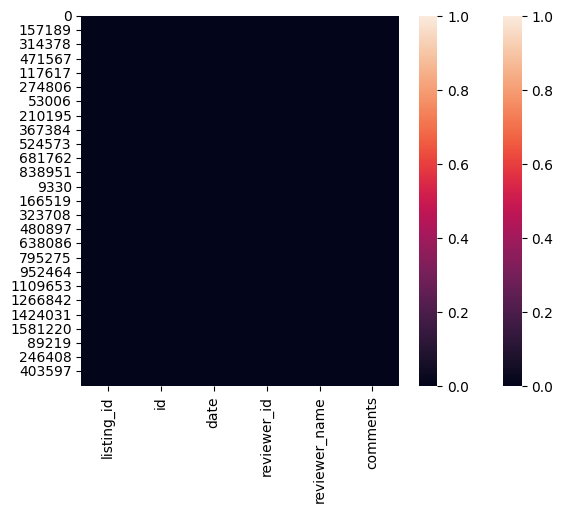

In [6]:
def visualize_missing_values(df):
    sns.heatmap(df.isnull())


visualize_missing_values(reviews)


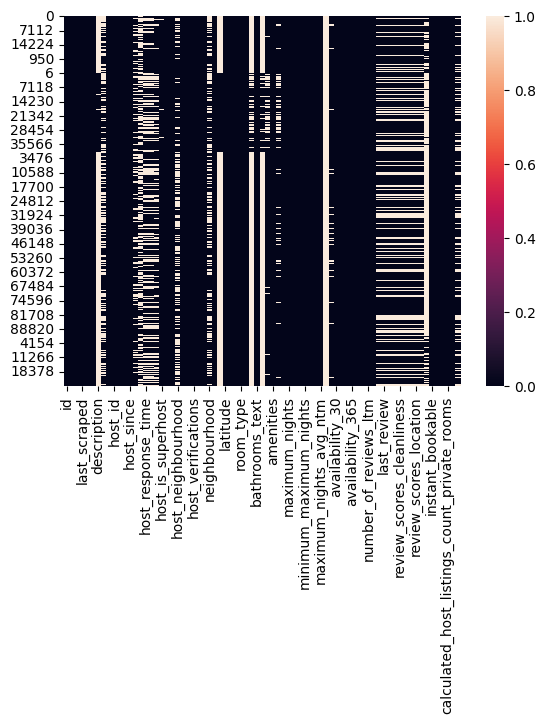

In [8]:
visualize_missing_values(listings)

In [18]:
def get_full_summary(df):
    # Numeric summary using describe() for numeric columns, updated include parameter
    numeric_summary = df.describe(include='number')
    
    # Adding median to numeric summary. Adjusting the method for potential compatibility issues
    try:
        median = df.median(numeric_only=True).to_frame().T.rename(index={0: 'median'})
    except TypeError:  # In case of unexpected TypeError, fall back to excluding non-numeric
        median = df.select_dtypes(include='number').median().to_frame().T.rename(index={0: 'median'})
    
    numeric_summary = pd.concat([numeric_summary, median], axis=0)

    # Categorical summary using describe() for categorical columns
    categorical_summary = df.describe(exclude='number')
    
    return {'numeric_summary': numeric_summary, 'categorical_summary': categorical_summary}

full_summary = get_full_summary(listings)
print("Numeric Summary:")
print(full_summary['numeric_summary'])
print("\nCategorical Summary:")
print(full_summary['categorical_summary'])

Numeric Summary:
                  id     scrape_id       host_id  host_listings_count  \
count   1.849020e+05  1.849020e+05  1.849020e+05        184887.000000   
mean    3.748961e+17  2.023410e+13  1.636313e+08            69.006750   
std     4.339954e+17  4.188633e+09  1.740111e+08           424.989234   
min     9.580000e+02  2.023120e+13  1.169000e+03             1.000000   
25%     2.227959e+07  2.023121e+13  2.137584e+07             1.000000   
50%     4.918232e+07  2.023121e+13  8.550403e+07             2.000000   
75%     8.461659e+17  2.024011e+13  2.765347e+08             7.000000   
max     1.084860e+18  2.024021e+13  5.597047e+08          5110.000000   
median  4.918232e+07  2.023121e+13  8.550403e+07             2.000000   

        host_total_listings_count       latitude      longitude  \
count               184887.000000  184902.000000  184902.000000   
mean                   115.096632      35.999010      -8.994592   
std                    674.522376      28.341661   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(df, column1, column2):
  
    # Set up the matplotlib figure and axes for two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the first column histogram
    df[column1].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Frequency')
    
    # Plot the second column histogram
    df[column2].hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
    axes[1].set_title(f'Histogram of {column2}')
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel('Frequency')
    
    # Ensure the layout is not too tight
    plt.tight_layout()
    
    # Display the plots
    plt.show()

In [17]:
import pandas as pd

def analyze_data_cleaning_needs(df):
    """
    Analyze a CSV file for common data cleaning needs.
    
    Args:
    csv_file_path (str): The path to the CSV file.
    
    Returns:
    dict: A summary of findings including missing values, data types, duplicates, and potential outliers.
    """
    
    # Initialize the analysis dictionary
    analysis = {
        "missing_values": df.isnull().sum(),
        "data_types": df.dtypes,
        "duplicate_rows": df.duplicated().sum(),
        "potential_outliers": {}
    }  
    
    # Check for potential outliers using IQR
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].shape[0]
        if outlier_count > 0:
            analysis["potential_outliers"][column] = outlier_count
            
    return analysis

analysis = analyze_data_cleaning_needs(listings)
analysis["missing_values"]

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               49970
Length: 75, dtype: int64